# Урок 1. Pandas и его базовые функции. Основы эксплораторного анализа (от слова explonatory - объяснительный)

### Подключение модулей

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Чтение из csv-файла (comma separated value). 
# Для других форматов данных существуют другие функции (read_json, read_html и др.)
data = pd.read_csv("data/titanic/train.csv")
# образует dataframe (датафрейм) - специальная, оптимизированная для работы с данными структура данных

In [22]:
# функция head() позволяет посмотреть содержимоe;
# по умолчанию - 5 строк, также можно указать нужное количество как параметр (e.g. data.head(5))
data.head()

,ID,Выжил,Класс,Имя,Пол,Возраст,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# названия колонок
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
# можно переименовывать
data.columns = ["ID", "Выжил", "Класс", "Имя","Пол","Возраст",'SibSp','Parch', 'Билет', 'Fare', 'Cabin', 'Embarked']

### Как узнать полезные вещи о наших данных

In [8]:
# информация о датафрейме - типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [13]:
# вот здесь начинается самый настоящий эксплораторный анализ
# функция describe() позволяет посчитать основные статистики для числовых данных в датафрейме
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# так можно смотреть количество записей в датафрейме
len(data)

891

In [15]:
# cодержимое каждой колонки в датафрейме можно вынести в отдельную переменную, 
# это будет называться Series - по смысле это схоже с последоватльностью данных.
names = data['Имя']

In [26]:
names[:5]

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

### А теперь все это в действии!

Давайте посмотрим, каков процент выживших

In [27]:
alive = data[data['Выжил'] == 1]
alive_percent = 100*len(alive)/len(data)
print("Всего выжило {0} из {1} человек на борту ({2:.2f}.%)".format(len(alive), len(data), alive_percent))

# здесь - пример форматирования строки и вещественных чисел

Всего выжило 342 из 891 человек на борту (38.38.%)


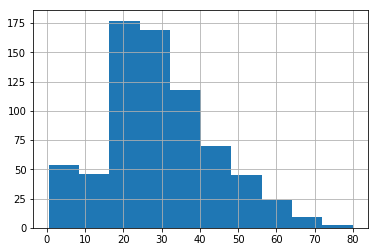

In [28]:
# а еще можно посмотреть распределение возрастов
# pandas позволяет на лету строить гистограммы

data['Возраст'].hist()

### А теперь о важном

Какие фичи вообще бывают?
 - категориальные 
 - порядковые
 - непрерывние
    
Всё это лучше всего показать на примере.

In [34]:
# категориальные

# основные особенности - нельзя их как-то отсортировать, можно группировать. к примеру.
# в нашем датасете это столбец с полом, к примеру

data['Пол'].head()

0      male
1    female
2    female
3    female
4      male
Name: Пол, dtype: object

In [35]:
# порядковые

# схожи с категоривльными, но у порядковых мы можем ввести относительный порядок между значениями и сортировку

data['Класс'].head()

0    3
1    1
2    3
3    1
4    3
Name: Класс, dtype: int64

In [37]:
# непрерывние

# принимает значения между любыми двумя точками 
# или между минимальными или максимальными значениями в столбце признаков.

data['Возраст'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Возраст, dtype: float64

### еще одна важная деталь

In [40]:
# очень часто данные попадаются "грязные" - с пропущенными значениями, с перепутанными типами, склеенными значениями...
# с этим надо как-то бороться :)

data = data.dropna()

In [43]:
data['Имя и билет'] = data['Билет'] + data['Имя']
data.head()

,ID,Выжил,Класс,Имя,Пол,Возраст,SibSp,Parch,Билет,Fare,Cabin,Embarked,Имя и билет
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"PC 17599Cumings, Mrs. John Bradley (Florence B..."
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"113803Futrelle, Mrs. Jacques Heath (Lily May P..."
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"17463McCarthy, Mr. Timothy J"
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"PP 9549Sandstrom, Miss. Marguerite Rut"
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"113783Bonnell, Miss. Elizabeth"


In [45]:
data['temp'] = 5
data.head()

,ID,Выжил,Класс,Имя,Пол,Возраст,SibSp,Parch,Билет,Fare,Cabin,Embarked,Имя и билет,temp
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"PC 17599Cumings, Mrs. John Bradley (Florence B...",5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"113803Futrelle, Mrs. Jacques Heath (Lily May P...",5
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"17463McCarthy, Mr. Timothy J",5
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"PP 9549Sandstrom, Miss. Marguerite Rut",5
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"113783Bonnell, Miss. Elizabeth",5


In [46]:
del data['temp']
data.head()

,ID,Выжил,Класс,Имя,Пол,Возраст,SibSp,Parch,Билет,Fare,Cabin,Embarked,Имя и билет
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"PC 17599Cumings, Mrs. John Bradley (Florence B..."
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"113803Futrelle, Mrs. Jacques Heath (Lily May P..."
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"17463McCarthy, Mr. Timothy J"
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"PP 9549Sandstrom, Miss. Marguerite Rut"
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"113783Bonnell, Miss. Elizabeth"


In [48]:
data['Год рождения'] = data['Возраст'].map(lambda x: 2018 - int(x))
data.head()

,ID,Выжил,Класс,Имя,Пол,Возраст,SibSp,Parch,Билет,Fare,Cabin,Embarked,Имя и билет,Год рождения
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"PC 17599Cumings, Mrs. John Bradley (Florence B...",1980
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"113803Futrelle, Mrs. Jacques Heath (Lily May P...",1983
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,"17463McCarthy, Mr. Timothy J",1964
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,"PP 9549Sandstrom, Miss. Marguerite Rut",2014
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,"113783Bonnell, Miss. Elizabeth",1960
